# model_GS_XGB

#### Grid_Search
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter  
https://www.codexa.net/hyperparameter-tuning-python/

In [1]:
# !jupyter nbconvert --to python model_GS_XGB.ipynb

[NbConvertApp] Converting notebook model_GS_XGB.ipynb to python
[NbConvertApp] Writing 2642 bytes to model_GS_XGB.py


In [1]:
# warningの無視
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import xgboost as xgb

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import f1_score

%matplotlib inline

#### =========要変更===========

In [3]:
path = "../data/models/"
modelName= "model_GS_XGB"

#### ========================

In [4]:
train_X=pd.read_pickle('../data/feature/train_X.pickle')
valid_X=pd.read_pickle('../data/feature/valid_X.pickle')
test_X=pd.read_pickle('../data/feature/test_X.pickle')

train_y=pd.read_pickle('../data/feature/train_y.pickle')
valid_y=pd.read_pickle('../data/feature/valid_y.pickle')
test_y=pd.read_pickle('../data/feature/test_y.pickle')

In [5]:
# xgboost用の型に変換
# https://xgboost.readthedocs.io/en/latest/python/python_intro.html#data-interface
# DataFrame.dtypes for data must be int, float, bool or categorical.
# When categorical type is supplied, DMatrix parameter `enable_categorical` must be set to `True`.
train_data = xgb.DMatrix(train_X, label=train_y,enable_categorical=True)
test_data = xgb.DMatrix(test_X, label=test_y,enable_categorical=True)
valid_data = xgb.DMatrix(valid_X, label=valid_y,enable_categorical=True)

In [6]:
"""ハイパーパラメータの max_depth(木の深さ), 
# n_estimators(決定木の数)に関してグリッドサーチを行う
# グリッドサーチに使用するパラメータの値を用意
"""
seed=1
params = {
    'max_depth': [10, 20, 30, 50],
    'n_estimators': [10, 100, 1000]}

#### =========要変更===========

In [7]:
model=xgb.XGBClassifier(random_state=seed)

#### ========================

In [8]:
grid = GridSearchCV(estimator=model,
    param_grid=params,
    n_jobs=1,
    cv=KFold(5,shuffle=True, random_state=seed),
    scoring='f1',
    verbose=3,
    return_train_score=True)

In [10]:
grid.fit(train_X,  train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[06:55:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END ..................max_depth=10, n_estimators=10; total time=   1.2s
[06:55:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END ..................max_depth=10, n_estimators=10; total time=   1.2s
[06:55:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metri

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
           

In [11]:
# 最適解でモデルを作成
model = grid.best_estimator_

In [12]:
# モデルの保存
with open(path + modelName + '.pickle', mode='wb') as f:
    pickle.dump(model, f)

#### ========================

In [13]:
pred=model.predict(test_X)

In [14]:
print(f1_score(test_y, pred))

0.9502808841287342


#### ========================

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

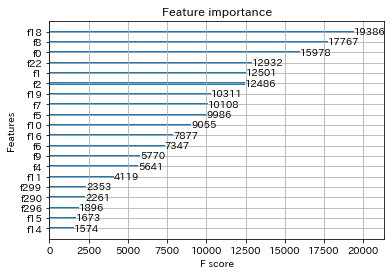

In [18]:
xgb.plot_importance(model,max_num_features=20)